In [2]:
# importing the dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
# data collection
# loading the dataset to a pandas dataframe
wine_dataset=pd.read_csv("winequality-red.csv")

In [4]:
# numbers of rows and columns in the dataset
wine_dataset.shape

(1596, 12)

In [5]:
# first 5 rows of the dataframe
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# checking for missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# Data analysis and visualization
# statistical measures of the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.314160,0.527954,0.270276,2.535558,0.087120,15.858396,46.382206,0.996744,3.311917,0.656385,10.421147,5.637218
std,1.732203,0.179176,0.193894,1.405515,0.045251,10.460554,32.839138,0.001888,0.153346,0.163057,1.060371,0.807080
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997833,3.400000,0.730000,11.100000,6.000000
max,15.600000,1.580000,0.790000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,1.980000,14.000000,8.000000


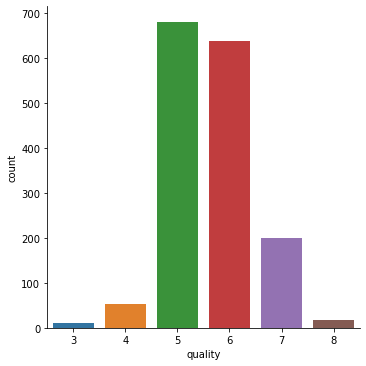

In [8]:
# numbers of values for each quality
sns.catplot(x='quality',data=wine_dataset,kind='count')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

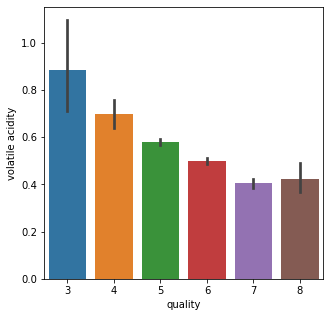

In [12]:
# volitile acidity vs quality ---checking relation
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

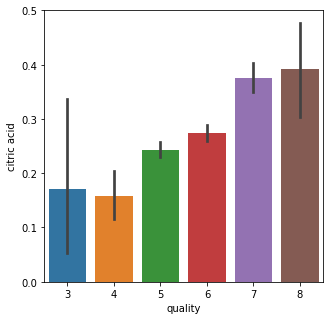

In [14]:
# citric acid vs quality 
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=wine_dataset)

In [20]:
# correlation  ---- Positive correlation and negative correlation

correlation=wine_dataset.corr()

<AxesSubplot:>

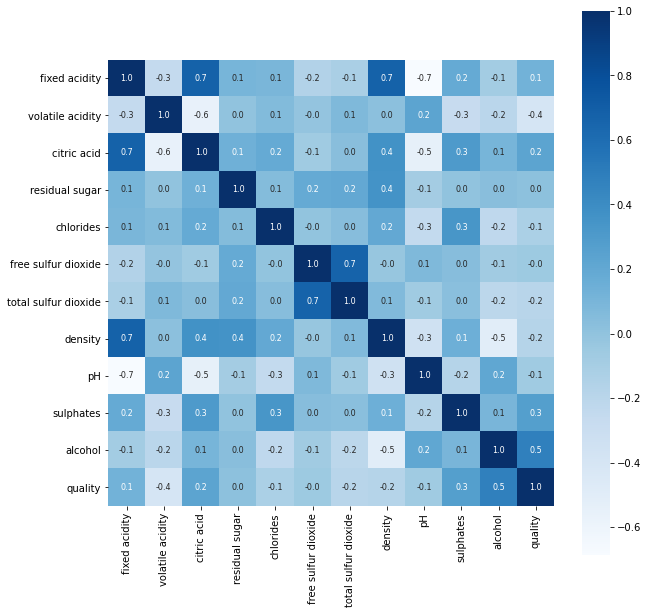

In [22]:
# Constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [30]:
# Data Preprocessing
# seperate the data and label
X=wine_dataset.drop('quality',axis=1)


In [29]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1591            6.2             0.600         0.08             2.0      0.090   
1592            5.9             0.550         0.10             2.2      0.062   
1593            6.3             0.510         0.13             2.3      0.076   
1594            5.9             0.645         0.12             2.0      0.075   
1595            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [31]:
# Label binarization (two quality values )
Y=wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [32]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1591    0
1592    0
1593    0
1594    0
1595    0
Name: quality, Length: 1596, dtype: int64

In [35]:
# Train and Test Split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [36]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1596,) (1276,) (320,)


In [37]:
# Model Training
# Random Forest Classifier
model=RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [38]:
# Model Evaluation
#Accuracy Score
#Accuracy on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [39]:
print('Accuracy :',test_data_accuracy)

Accuracy : 0.9


In [40]:
# Building a predictive System
input_data=(7.8,0.58,0.02,2,0.073,9,18,0.9968,3.36,0.57,9.5)

# change the input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

# reshape the numpy array as we r predicting for only 1 instance
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshape)
print(prediction)

[1]


C:\Users\Neha\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [42]:
if prediction[0]==1:
    print("The wine quality is Good.")
else:
    print("The wine quality is Bad.")

The wine quality is Good.
